In [472]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df1 = pd.read_csv(city_data_to_load)
df2 = pd.read_csv(ride_data_to_load)
#print(df1.head())
#print(df2.head())


# Combine the data into a single dataset
merged_df = pd.merge(df2, df1, on = "city", how = "left")

# more than one of the same name? drop the duplicates and keep only first data
# Do not rewrite merged_df, need to rename as something else for the next cell
merged_df_nodup = merged_df.drop_duplicates("city", keep = 'first')
merged_df = merged_df[["city", "date", "fare", "ride_id", "driver_count", "type"]]
# Display the data table for preview
merged_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

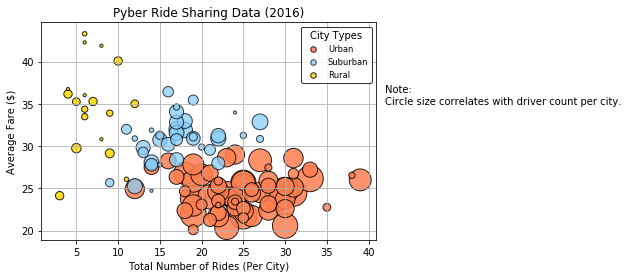

In [476]:
# Obtain the x and y coordinates for each of the three city types
# create df with all the necessary data
#x
gb_city = merged_df.groupby('city')
ride_count = gb_city.ride_id.count()
#print(ride_count)

#y
mean_fare = gb_city.mean().fare
#print(fare)
driver_count = gb_city.mean().driver_count
#print(driver_count)

# Create 3 separate plots to make it easier...? df column for type of city

# Cannot index with duplicate... Error with duplicate values for set_index
# -> Go back to cell 1 to drop the same name of city, we only need per city
# When using gb_city... Cannot access callable attribute 'set_index' of 'DataFrameGroupBy' objects, try using the 'apply' method
# -> Make sure not to use gb_city, go back and used the merged_df
city_type = merged_df_nodup.set_index('city').type
# Count showed up as 1, do not overwrite the merged_df with new merged_df, create a new variable to store the no duplicates df
#print(city_type)

# Dataframe
df = pd.DataFrame({"No. rides": ride_count,\
                   "Fare": mean_fare,\
                   "No. drivers": driver_count,\
                  "Type of city": city_type})                
#df
# Read the df that we just created by number of drivers from greatest to least with ascending = False
df_sorted = df.sort_values("No. drivers", ascending = False)
#print(df_sorted)

# Separate the into separate dataframes by type of city: rural, suburban, urban
rural = df_sorted[df_sorted["Type of city"] == "Rural"]
suburban = df_sorted[df_sorted["Type of city"] == "Suburban"]
urban = df_sorted[df_sorted["Type of city"] == "Urban"]
#print(rural)
#print(suburban)
#print(urban)


# Build the scatter plots for [each city types]
# Just realised there was a hint in this direction...
# Parameters for scatter(x,y, size, color ,)
# size: Scale the size parameter to look like example provided
# color: https://matplotlib.org/examples/color/named_colors.html
# edgecolor: black?
# label: label according to data
# colors are off...
plt.scatter(urban["No. rides"], urban["Fare"], s = urban["No. drivers"] * 10 , color = "coral", edgecolor = "Black", label = "Urban", alpha = 0.85)
plt.scatter(suburban["No. rides"], suburban["Fare"], s = suburban["No. drivers"] * 10 , color = "lightskyblue", edgecolor = "Black", label = "Suburban", alpha = 0.75)
plt.scatter(rural["No. rides"], rural["Fare"], s = rural["No. drivers"] * 10 , color = "gold", edgecolor = "Black", label = "Rural", alpha = 0.85)

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Incorporate a text label regarding circle size
# Create a legend, stackoverflow
# fontsize parameter
lgnd = plt.legend(frameon = True, fancybox = True, edgecolor = 'black', title = "City Types", fontsize = "small")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


# Save Figure
plt.savefig("pyberdata.png")

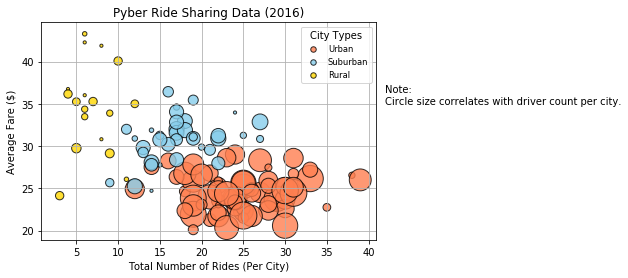

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

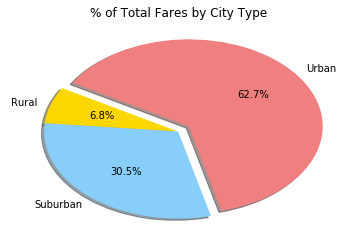

In [539]:
# Calculate Type Percents
# group total fares by city type
gb_type = merged_df.groupby("type")["type", "fare"]
#total fare by each city
fare_sum = gb_type.sum().fare
#print(fare_sum)


labels = ["Rural", "Suburban", "Urban"]
#Could have created this for the last cell
colors = ["gold", "lightskyblue", "lightcoral"]
# Adjust explode for urban
explode = [0, 0, 0.1]
# Build Pie Chart
plt.pie(fare_sum, explode = explode, labels = labels, colors = colors, autopct = "%.1f%%", shadow = True, startangle= 150)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("percentfares.png")

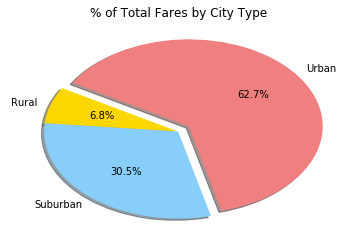

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

Text(0.5,1,'% of Total Rides by City Type')

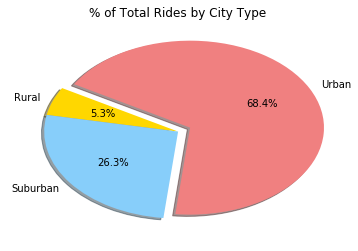

In [556]:
# Calculate Ride Percents
# Get total rides by the city type
gb_type = merged_df.groupby("type")["type", "ride_id"]
ride_count = gb_type.count().ride_id
#print(ride_count)

#label/colors/explode parameters from before
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0, 0, 0.1]

# Build Pie Chart
plt.pie(ride_count, explode = explode, labels = labels, colors = colors, autopct = "%.1f%%", shadow = True, startangle= 150)
plt.title("% of Total Rides by City Type")
# Save Figure


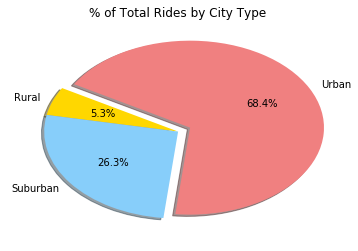

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

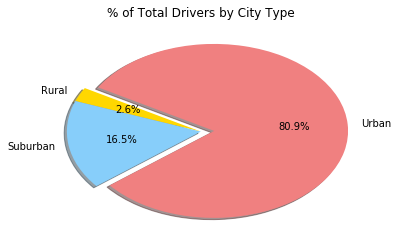

In [558]:
# Calculate Driver Percents
# For total drivers by city type, use the dataframe without duplicates, get the total of the driver count over 'type'
driver_sum = merged_df_nodup.groupby("type").sum().driver_count
#print(driver_sum)

# Build Pie Charts
plt.pie(driver_sum, explode = explode, labels = labels, colors = colors, autopct = "%.1f%%", shadow = True, startangle= 150)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("totaldrivers.png")

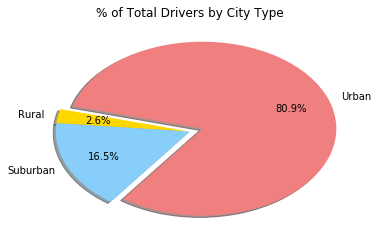

In [6]:
# Show Figure
plt.show()